In [ ]:
import math
result = math.comb(15,5)
print(result)  # Output: 10

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

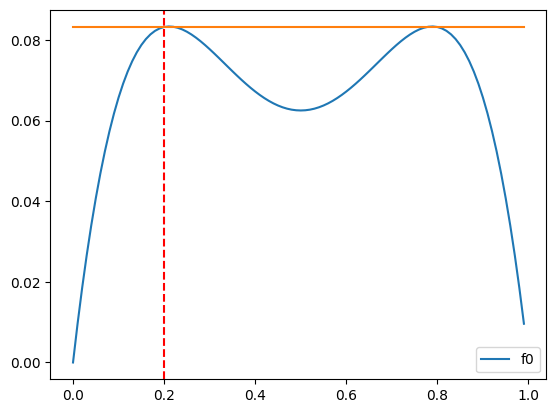

In [99]:
K=4
f = lambda p: p * (1 - p)**K + (1 - p) * p**K
g=[f(p) for p in np.arange(0,1,0.01)]
# g1=[(1-q)**(K-1)*(1-(K+1)*q) for q in np.arange(0,1,0.01)]
# g2=[-(1-q)**(K-2)*(2*K-K*(K+1)*q) for q in np.arange(0,1,0.01)]
plt.plot(np.arange(0,1,0.01),g,label='f0')
plt.plot(np.arange(0,1,0.01),[f(1/(K+1))]*100)
plt.axvline(x=1/(K+1), color='r', linestyle='--')  # red dashed vertical line at x = 0
plt.legend()

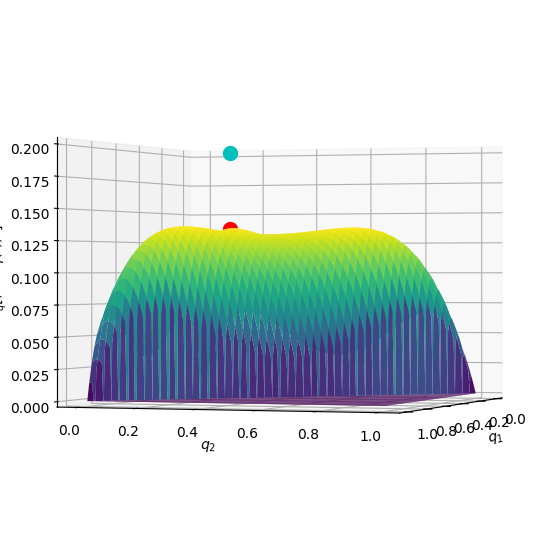

In [111]:
# Set the value of K
K = 5

# Create a grid of (q1, q2) values over the 2-simplex
q1_vals = np.linspace(0, 1, 200)
q2_vals = np.linspace(0, 1, 200)
Q1, Q2 = np.meshgrid(q1_vals, q2_vals)

# Compute q3 = 1 - q1 - q2 and mask invalid (q1, q2) pairs where q3 < 0
Q3 = 1 - Q1 - Q2
mask = (Q3 >= 0)

# Compute the function only on valid (q1, q2)
f_vals = np.zeros_like(Q1)
f_vals[mask] = Q1[mask] * (1 - Q1[mask])**K + Q2[mask] * (1 - Q2[mask])**K + Q3[mask] * (1 - Q3[mask])**K

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Q1, Q2, f_vals, cmap='viridis', edgecolor='none')

# Add a red vertical line at q1 = q2 = 1/3
q_eq = 1/(K+1)
f_eq = q_eq * (1 - q_eq)**K + q_eq * (1 - q_eq)**K + (1 - 2*q_eq) * (1 - (1 - 2*q_eq))**K
f_up = 3* q_eq * (1 - q_eq)**K
ax.plot([q_eq], [q_eq], [f_eq], marker='o', color='red', markersize=10, label='$q_1 = q_2 = 1/3$')
ax.plot([q_eq], [q_eq], [f_up], marker='o', color='c', markersize=10, label='$q_1 = q_2 = 1/3$')

# Labels and view
ax.set_xlabel('$q_1$')
ax.set_ylabel('$q_2$')
ax.set_zlabel('$\mathbb{E}_q[(1 - q(r))^K]$')
# ax.set_title(f'Plot of $\\mathbb{{E}}_q[(1 - q(r))^K]$ for K = {K}')
ax.view_init(elev=0, azim=20)

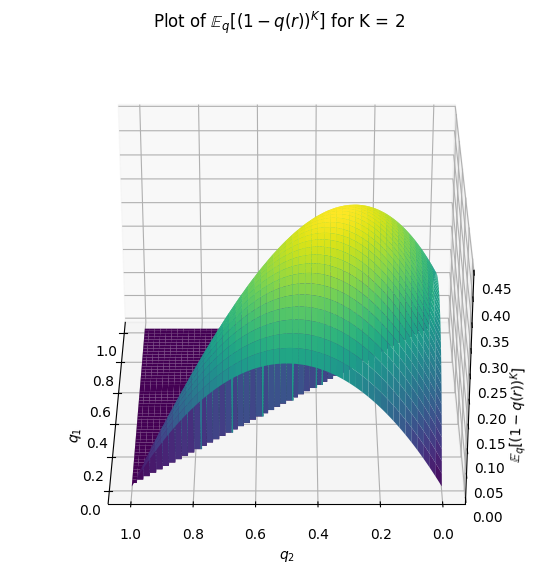

In [15]:
# Set the value of K
K = 2
q1_vals = np.linspace(0, 1, 200)
q2_vals = np.linspace(0, 1, 200)
Q1, Q2 = np.meshgrid(q1_vals, q2_vals)
Q3 = 1 - Q1 - Q2
mask = (Q3 >= 0)
f_vals = np.zeros_like(Q1)
f_vals[mask] = Q1[mask] * (1 - Q1[mask])**K + Q2[mask] * (1 - Q2[mask])**K + Q3[mask] * (1 - Q3[mask])**K
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Q1, Q2, f_vals, cmap='viridis', edgecolor='none')
ax.set_xlabel('$q_1$')
ax.set_ylabel('$q_2$')
ax.set_zlabel('$\mathbb{E}_q[(1 - q(r))^K]$')
ax.set_title(f'Plot of $\\mathbb{{E}}_q[(1 - q(r))^K]$ for K = {K}')
ax.view_init(elev=30, azim=180)

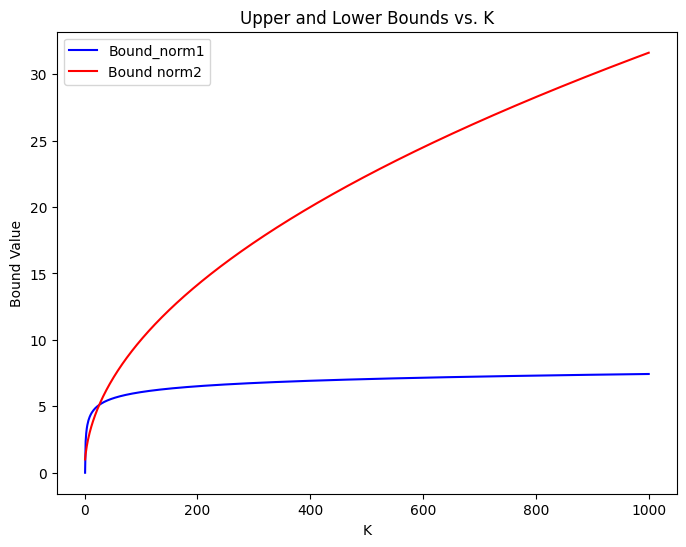

In [3]:
K_values = np.arange(1, 1001)
bound1 = 2 * np.sqrt(2 * np.log(K_values))
bound2 =  np.sqrt(K_values) 

# Plot upper and lower bounds
plt.figure(figsize=(8, 6))
plt.plot(K_values, bound1, label='Bound_norm1', color='blue')
plt.plot(K_values, bound2, label='Bound norm2', color='red')

plt.xlabel("K")
plt.ylabel("Bound Value")
plt.title("Upper and Lower Bounds vs. K")
plt.legend()

In [14]:
# Parameters
num_samples = 10000
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # Identity matrix

# Generate random Gaussian vectors
samples = np.random.multivariate_normal(mean, cov, num_samples)

# Compute the 2-norm of each vector
norms = np.linalg.norm(samples, axis=1)

# Compute the average 2-norm
average_norm = np.mean(norms)

print("Average 2-norm:", average_norm)


Average 2-norm: 1.2403444555219714


In [5]:
np.sqrt(2)*np.sqrt(2/3)

1.1547005383792517

In [4]:
np.sqrt(2)

1.4142135623730951

In [11]:
r=100
e=1/r
K=1
upper=2*np.sqrt(2)*(np.pi*e+np.exp(-e*K))
lower=2/np.sqrt(3)*(1-np.cos(np.pi*e/2))*np.exp(-e*K/(1-e))

In [17]:
# Estimate expectation of cos(x) where x is uniformly distributed on [0, e*pi]
num_samples_x = 1000
x_samples = np.random.uniform(0, e * np.pi, num_samples_x)
cos_expectation = np.mean(np.cos(x_samples))

print("Estimated expectation of cos(x):", cos_expectation)

Estimated expectation of cos(x): 0.9998367188076422


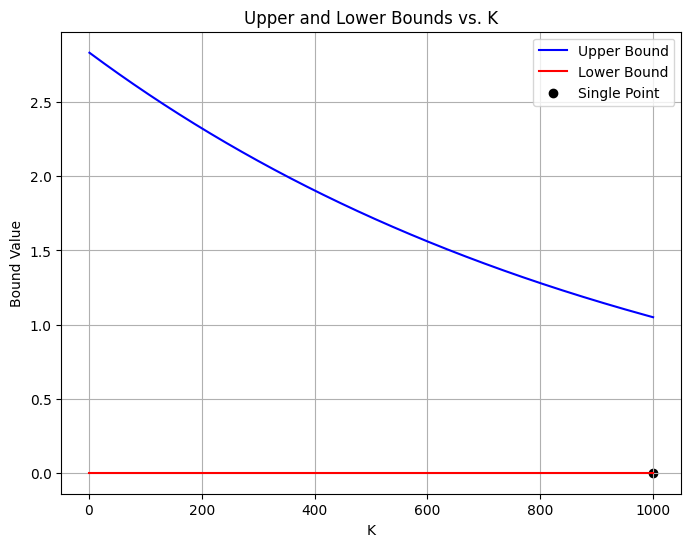

In [50]:
# Compute upper and lower bounds for different values of K
r = 1000
e = 1 / r
K_values = np.arange(1, 1001)
upper_bounds = 2 * np.sqrt(2) * (np.pi * e + np.exp(-e * K_values))
lower_bounds =  (2 / np.sqrt(3)) * (1 - np.cos(np.pi * e / 2)) * np.exp(-e * K_values / (1 - e)) 

# Plot upper and lower bounds
plt.figure(figsize=(8, 6))
plt.plot(K_values, upper_bounds, label='Upper Bound', color='blue')
plt.plot(K_values, lower_bounds, label='Lower Bound', color='red')

# Plot a single dot at (r, (2*e*np.pi)**2 / (2*np.sqrt(2)))
dot_x = r
dot_y = (2 * e * np.pi) ** 2 / (2 * np.sqrt(2))
plt.scatter([dot_x], [dot_y], color='black', marker='o', label='Single Point')

plt.xlabel("K")
plt.ylabel("Bound Value")
plt.title("Upper and Lower Bounds vs. K")
plt.legend()
plt.grid()
plt.show()


In [51]:
dot_y > lower_bounds[-1]

True

In [39]:
# Print results
for K, upper, lower in zip(K_values, upper_bounds, lower_bounds):
    print(f"K={K}, Upper={upper}, Lower={lower}")

K=1, Upper=2.8891414633897705, Lower=0.00014102086813913995
K=2, Upper=2.861278173984223, Lower=0.00013960358497188498
K=3, Upper=2.8336921289405566, Lower=0.0001382005457360615
K=4, Upper=2.8063805696312776, Lower=0.0001368116072777908
K=5, Upper=2.7793407648776953, Lower=0.00013543662788191447
K=6, Upper=2.752570010676801, Lower=0.00013407546725753496
K=7, Upper=2.726065629930866, Lower=0.0001327279865237016
K=8, Upper=2.699824972179728, Lower=0.0001313940481952403
K=9, Upper=2.673845413335745, Lower=0.00013007351616872584
K=10, Upper=2.648124355421383, Lower=0.00012876625570859516
K=11, Upper=2.6226592263094166, Lower=0.00012747213343339986
K=12, Upper=2.5974474794657127, Lower=0.0001261910173021973
K=13, Upper=2.5724865936945776, Lower=0.00012492277660107836
K=14, Upper=2.5477740728866336, Lower=0.00012366728192983033
K=15, Upper=2.5233074457692055, Lower=0.0001224244051887342
K=16, Upper=2.499084265659193, Lower=0.00012119401956549439
K=17, Upper=2.475102110218399, Lower=0.0001199